<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-Diego1733/blob/main/Ago18-19/Ago18-19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mi código:

y_media =  10.389629629629631
f(x) = 36.4164559025002 - 0.0133308857109593*x
w1 =  36.41645590250024
w0 =  -0.013330885710959259
Coeficiente de correlación r =  -0.9013055179502742
81.24% de los datos está descrito en el modelo lineal


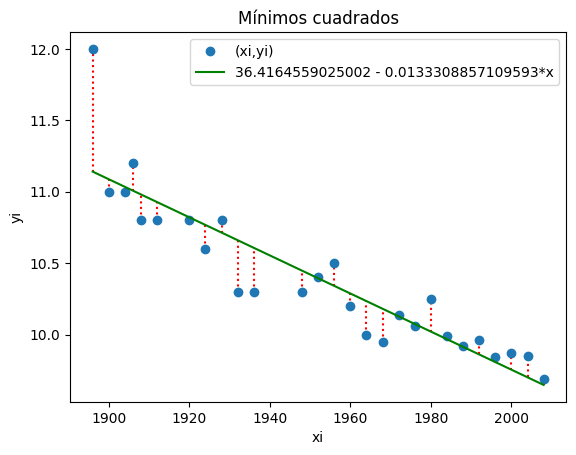

In [7]:
import numpy as np
from numpy.linalg import inv
import sympy as sym
import matplotlib.pyplot as plt


"""Si usamos loadtxt() sin .T, lee en filas no en columnas"""


data = np.loadtxt("/content/drive/MyDrive/ML2023/olympic100m_men (1).txt", delimiter=',').T

xi = np.array(data[0])
yi = np.array(data[1])

xm = np.mean(xi)
ym = np.mean(yi)
n = len(xi)
sumx = np.sum(xi)
sumy = np.sum(yi)
sumxy = np.sum(xi*yi)
sumx2 = np.sum(xi**2)
sumy2 = np.sum(yi**2)

a1 = ((n*sumxy)-(sumx*sumy))/((n*sumx2)-sumx**2) #m
a0 = ym - (a1*xm)                                #b

#Creación del polinomio:
x = sym.Symbol('x')
f = a0 + a1*x

fx = sym.lambdify(x,f)
fi = fx(xi)

#Coeficiente de correlación:

numerador = (n*sumxy) - (sumx*sumy)
raiz1 = np.sqrt((n*sumx2)-(sumx**2))
raiz2 = np.sqrt((n*sumy2) - (sumy**2))
r = numerador / (raiz1 * raiz2)

#Coeficiente de determinación r**2

r2 = r**2
r2_porcentual = np.around(r2*100, 2)


print('y_media = ',ym)
print('f(x) =', f)
print('w1 = ',a0)
print('w0 = ',a1)
print('Coeficiente de correlación r = ', r)
print(str(r2_porcentual)+'% de los datos está descrito en el modelo lineal')

for i in range(0,n,1):
  y0 = np.min([yi[i],fi[i]])
  y1 = np.max([yi[i],fi[i]])
  plt.vlines(xi[i],y0,y1, color='red',
             linestyle='dotted')

plt.plot(xi,yi,'o', label='(xi,yi)')


plt.plot(xi,fi, color = 'green', label=f)
plt.xlabel('xi')
plt.ylabel('yi')
plt.title('Mínimos cuadrados')
plt.legend()
plt.show()

w0: 36.41645590250286, w1: -0.013330885710960602


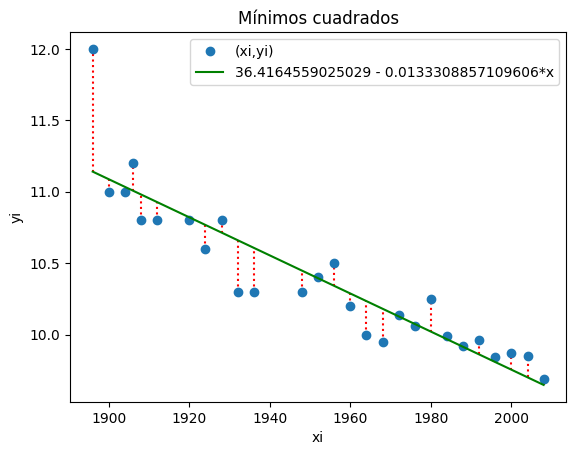

In [8]:
#IMPLEMENTAR METODO MATRICIAL:
#Código hecho en clase
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt


data1 = np.loadtxt("/content/drive/MyDrive/ML2023/olympic100m_men (1).txt", delimiter=',').T
x = data1[0]
y = data1[1]
n = len(x)
def w(x, y):
  xbar = x.mean()
  ybar = y.mean()
  xxbar = (x**2).mean()
  xybar = (x*y).mean()
  w1 = (ybar * xbar - xybar) / (xbar*xbar - xxbar)
  w0 = ybar - w1*xbar
  return w0, w1

w0, w1 = w(x, y)
print(f"w0: {w0}, w1: {w1}")
x_ = sym.Symbol("x")
f = w0 + w1*x_
f_x = sym.lambdify(x_,f)
f_i = f_x(x)

for i in range(0,n,1):
  y0 = np.min([y[i],f_i[i]])
  y1 = np.max([y[i],f_i[i]])
  plt.vlines(x[i],y0,y1, color='red',
             linestyle='dotted')

plt.plot(x,y,'o', label='(xi,yi)')#Imprimir puntos
plt.plot(x,f_i, color = 'red', label=f) #Predicción
plt.xlabel('xi')
plt.ylabel('yi')
plt.title('Mínimos cuadrados')
plt.legend()
plt.show()

[ 3.64164559e+01 -1.33308857e-02]
w0: 36.41645590249904, w1: -0.013330885710960805


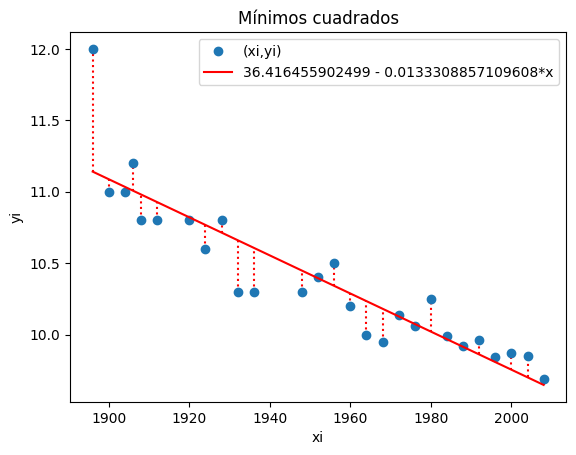

In [9]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

data1 = np.loadtxt("/content/drive/MyDrive/ML2023/olympic100m_men (1).txt", delimiter=',').T
x = np.array(data1[0])
y = np.array(data1[1])

def w(x, y):
  X = np.vstack((np.ones_like(x), x)).T #CREA UNA FILA DE VECTORES UNO, una con X y luego crea la matriz
  Xt = X.T
  XtX = np.matmul(Xt, X)
  XtXi = np.linalg.inv(XtX)
  Xy = np.matmul(Xt, y)
  w = np.matmul(XtXi, Xy)
  return w

W = w(x, y)
print(W)
#DEFINIR UNA FUNCIÓN PARA QUE AHORA y = wo + w1x + w2x**2
w0 = W[0]
w1 = W[1]

print(f"w0: {w0}, w1: {w1}")
x_ = sym.Symbol("x")
f = w0 + w1*x_
f_x = sym.lambdify(x_,f)
f_i = f_x(x)

for i in range(0,n,1):
  y0 = np.min([y[i],f_i[i]])
  y1 = np.max([y[i],f_i[i]])
  plt.vlines(x[i],y0,y1, color='red',
             linestyle='dotted')

plt.plot(x,y,'o', label='(xi,yi)')#Imprimir puntos
plt.plot(x,f_i, color = 'red', label=f) #Predicción
plt.xlabel('xi')
plt.ylabel('yi')
plt.title('Mínimos cuadrados')
plt.legend()
plt.show()

[ 4.55597856e+02 -4.43160486e-01  1.10151552e-04]
w0: 455.59785610776737, w1: -0.4431604858470619, w2: 0.00011015155205602548


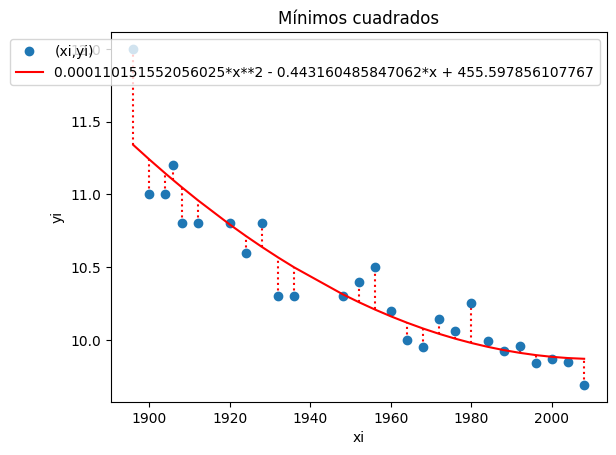

In [11]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

data1 = np.loadtxt("/content/drive/MyDrive/ML2023/olympic100m_men (1).txt", delimiter=',').T
x = np.array(data1[0])
y = np.array(data1[1])

def w(x, y):
  X = np.vstack((np.ones_like(x), x, x**2)).T #CREA UNA FILA DE VECTORES UNO, una con X y luego crea la matriz
  Xt = X.T
  XtX = np.matmul(Xt, X)
  XtXi = np.linalg.inv(XtX)
  Xy = np.matmul(Xt, y)
  w = np.matmul(XtXi, Xy)
  return w

W = w(x, y)
print(W)
#DEFINIR UNA FUNCIÓN PARA QUE AHORA y = wo + w1x + w2x**2
w0 = W[0]
w1 = W[1]
w2 = W[2]
print(f"w0: {w0}, w1: {w1}, w2: {w2}")
x_ = sym.Symbol("x")
f = w0 + w1*x_ + w2*x_**2
f_x = sym.lambdify(x_,f)
f_i = f_x(x)

for i in range(0,n,1):
  y0 = np.min([y[i],f_i[i]])
  y1 = np.max([y[i],f_i[i]])
  plt.vlines(x[i],y0,y1, color='red',
             linestyle='dotted')

plt.plot(x,y,'o', label='(xi,yi)')#Imprimir puntos
plt.plot(x,f_i, color = 'red', label=f) #Predicción
plt.xlabel('xi')
plt.ylabel('yi')
plt.title('Mínimos cuadrados')
plt.legend()
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
import numpy as np

data1 = np.loadtxt("/content/drive/MyDrive/ML2023/olympic100m_men (1).txt", delimiter=',').T
x = np.array(data1[0])
y = np.array(data1[1])

lr = LinearRegression()
x_ = x.reshape(-1, 1)
lr.fit(x_, y)

#EJEMPLO
X = np.array([[1, 1],
              [1, 2],
              [2, 2],
              [2, 3]])

# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
#Returns the dot product of a and b.
#If a and b are both scalars or both 1-D arrays then a scalar is returned;
#otherwise an array is returned. If out is given, then it is returned.
reg = LinearRegression().fit(X, y)
reg.score(X, y)
reg.predict(X)

array([ 6.,  8.,  9., 11.])